# 6.2 做出预测

让我们看看6-1中的树是如何进行预测的。假设你有一朵鸢尾花，要对其进行分类。你从根节点开始（深度为0， 在顶部）：该节点询问花的花瓣长度是否小于2.45cm。如果是，则向下移动到根的左子节点（深度1，左）。在这种情况下，他是一片叶子节点，因此不会提出任何问题：只需查看该节点的预测类，然后决策树就可以预测花朵是山鸢尾花（class=setosa）.

现在假设你发现了另一朵花，这次花瓣的长度大于2.45cm，你必须向下移动到根的右子节点（深度1，右），该子节点不是叶子节点，因此该节点会问另一个问题：花瓣宽度是否小于1.75cm？如果是，则你的花朵很可能是变色鸢尾花（深度2，左）。如果不是，则可能是维吉尼亚鸢尾花（深度2，右）。就是这么简单。

**PS:决策树的许多特质之一就是他们几乎不需要数据准备。实际上，它们根本不要特征缩放或居中**

节点的samples属性统计它应用的训练实例数量。例如，有100个训练实例的花瓣长度大于2.45cm（深度1，右），其中54个花瓣宽度小于1.75cm（深度2，左）。节点的value属性说明了该节点上每个类别的训练实例数量。例如，右下节点应用在0个山鸢尾、1个变色鸢尾和45个维吉尼亚鸢尾实例上。最后，节点的gini属性衡量其不纯度（impurity）：如果应用的所有训练实例都属于同一个类别，那么节点就是“纯”的（gini=0）。例如，深度1左侧节点仅应用于山鸢尾花训练实例，所以它就是纯的，并且gini值为0。公式6-1说明了第i个节点的基尼系数Gi的计算方式。例如，深度2左侧节点，基尼系数等于 $1–(0/54)^2–(49/54)^2–(5/54)^2≈0.168$。


公式6-1：基尼不纯度

$$
G_i = 1 - \sum_{k=1}^n p_{i, k}^2     \tag{6-1}
$$

- $p_{i,k}$是第$i$个节点中训练实例之间的$k$类实例的比率


**Scikit-Learn使用的是CART算法，该算法仅生成二叉树：非叶子节点永远只有两个子节点（即问题答案仅有是或否）。但是，其他的算法（比如ID3生成的决策树），其节点可以拥有两个以上的子节点。**

In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

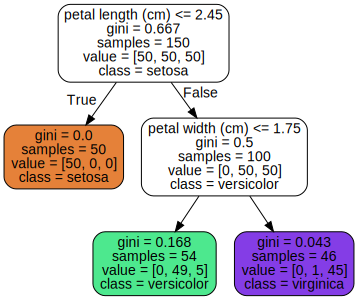

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, lengend=True, plot_training=True):
    """
    绘制决策树的决策边界
    """
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18)
    if lengend:
        plt.legend()

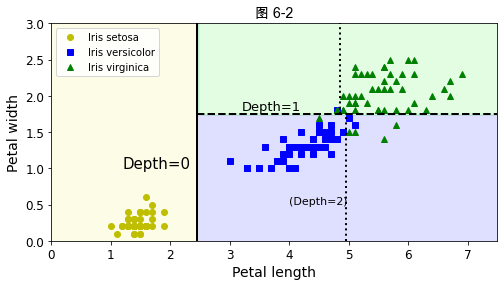

In [44]:
from matplotlib import font_manager

fontP = font_manager.FontProperties(fname="./fonts/Arial Unicode.ttf")
# fontP.set_family('monospace')
fontP.set_size(14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.20, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.0, 0.5, "(Depth=2)", fontsize=11)

plt.title("图 6-2", fontproperties=fontP)
plt.show()

图6-2显示了决策树的决策边界。加粗直线表示根节点（深度0）的决策边界：花瓣长度=2.45cm。因为左侧区域是纯的（只有山鸢尾花），所以它不可再分。但是右侧区域是不纯的，所以深度1右侧的节点在花瓣宽度=1.75cm处（虚线所示）再次分裂。因为这里最大深度max_depth设置为2，所以决策树在此停止。但是如果你将max_depth设置为3，那么两个深度为2的节点将各自再产生一条决策边界（点线所示）。

**模型解释：白盒子与黑盒子**

决策树是直观的，其决策也易于解释。这种模型通常称为白盒模型。相反，正如我们将看到的，通常将随机森林或神经网络视为黑盒模型。它们做出了很好的预测，你可以轻松地检查它们为做出这些预测而执行的计算。但是，通常很难用简单的话语来解释为什么做出这样的预测。例如，如果神经网络说某个人出现在图片上，那么很难知道是什么因素促成了这一预测：该模型识别该人的眼睛、嘴、鼻子、鞋子，甚至他们坐的沙发？相反，决策树提供了很好的、简单的分类规则，如果需要的话，甚至可以手动应用这些规则（例如，用于花的分类）。